In [1]:
!pip install tensorflow
!pip install torchvision
!pip install --upgrade torch torchvision
!pip install --upgrade torch torchvision torchaudio



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


In [4]:
##  Extract and Prepare the Dataset

In [4]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

data_dir = "/Users/santhoshms/Desktop/Python/Multiclass Fish Image/images/data"

# Data augmentations for training, simple transforms for validation/test
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

train_data = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=train_transforms)
val_data = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=val_test_transforms)
test_data = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=val_test_transforms)

batch_size = 32

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

class_names = train_data.classes
print("Classes:", class_names)


Classes: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


In [8]:
##  Build and Train Your First CNN Model

In [6]:
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 56 * 56, 128),  # if input is (224, 224)
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN(num_classes=len(class_names)).to(device)


In [10]:
##   Train Your CNN Model

In [8]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [18]:
train_acc_list = []
val_acc_list = []
train_loss_list = []
val_loss_list = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = correct / total

    # Validation step
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for val_images, val_labels in val_loader:
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            outputs = model(val_images)
            loss = criterion(outputs, val_labels)
            val_loss += loss.item() * val_images.size(0)
            _, predicted = torch.max(outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (predicted == val_labels).sum().item()

    val_loss = val_loss / len(val_loader.dataset)
    val_acc = val_correct / val_total

    # 📝 Save metrics
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

    print(f"Epoch {epoch+1}/{epochs} | "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")



Epoch 1/10 | Train Loss: 0.2724, Train Acc: 0.9078 | Val Loss: 0.1591, Val Acc: 0.9579
Epoch 2/10 | Train Loss: 0.2378, Train Acc: 0.9202 | Val Loss: 0.1428, Val Acc: 0.9689
Epoch 3/10 | Train Loss: 0.2332, Train Acc: 0.9235 | Val Loss: 0.1225, Val Acc: 0.9734
Epoch 4/10 | Train Loss: 0.2242, Train Acc: 0.9242 | Val Loss: 0.0727, Val Acc: 0.9826
Epoch 5/10 | Train Loss: 0.2397, Train Acc: 0.9224 | Val Loss: 0.1239, Val Acc: 0.9771
Epoch 6/10 | Train Loss: 0.2052, Train Acc: 0.9301 | Val Loss: 0.0944, Val Acc: 0.9780
Epoch 7/10 | Train Loss: 0.1767, Train Acc: 0.9377 | Val Loss: 0.1174, Val Acc: 0.9753
Epoch 8/10 | Train Loss: 0.2071, Train Acc: 0.9335 | Val Loss: 0.1265, Val Acc: 0.9817
Epoch 9/10 | Train Loss: 0.1669, Train Acc: 0.9427 | Val Loss: 0.1201, Val Acc: 0.9817
Epoch 10/10 | Train Loss: 0.1755, Train Acc: 0.9406 | Val Loss: 0.0936, Val Acc: 0.9853


In [ ]:
## Evaluate Model on the Test Set

In [20]:
model.eval()
test_loss = 0.0
test_correct = 0
test_total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()
test_loss = test_loss / len(test_loader.dataset)
test_acc = test_correct / test_total
print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")


Test Loss: 0.0691 | Test Accuracy: 0.9890


In [ ]:
## Saving Model

In [22]:
torch.save(model.state_dict(), "fish_classifier_v1.pth")

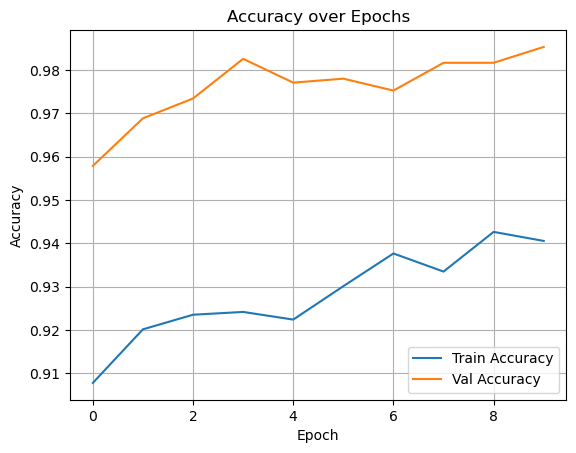

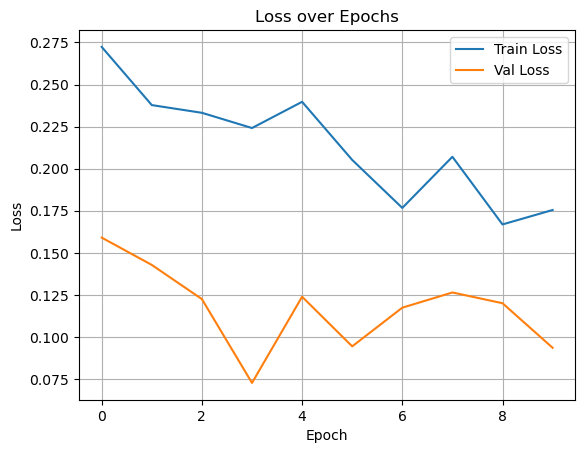

In [24]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(val_acc_list, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.grid(True)
plt.show()

# Loss Plot
plt.plot(train_loss_list, label='Train Loss')
plt.plot(val_loss_list, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.grid(True)
plt.show()


In [ ]:
## Load the Model

In [26]:
model = SimpleCNN(num_classes=len(class_names))  # class_names is your label list from ImageFolder

# Load the trained weights
model.load_state_dict(torch.load("fish_classifier_v1.pth", map_location=torch.device('cpu')))  # use 'cuda' if preferred
model.eval()  # Set to inference mode


SimpleCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=200704, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=128, out_features=11, bias=True)
  )
)

In [64]:
img_path = "path/to/your/image.jpg"

image = preprocess_image(img_path)
image = image.to(next(model.parameters()).device)  # Ensures correct device

with torch.no_grad():
    outputs = model(image)
    _, predicted = torch.max(outputs, 1)
    predicted_class = class_names[predicted.item()]

print(f"Predicted class: {predicted_class}")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/santhoshms/Desktop/Python/Multiclass Fish Image/path/to/your/image.jpg'